In [1]:
import pyedflib
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk
from sklearn.ensemble import IsolationForest

In [2]:
def read_edf_to_dataframe(file_path):
    # Чтение EDF файла
    f = pyedflib.EdfReader(file_path)
    n_signals = f.signals_in_file           # Получаем количество каналов в файле
    df = pd.DataFrame()

    for i in range(n_signals):              # Цикл по всем каналам
        signal = f.readSignal(i)
        label = f.getLabel(i)
        df[label] = signal                  # Добавляем канал в DataFrame с соответствующей меткой

    start_datetime = f.getStartdatetime()   # Получаем дату и время начала записи
    periods = df.shape[0]                   # Получаем количество строк в DataFrame (количество отсчетов)
    freq_sec = pd.to_timedelta(1000 / f.getSampleFrequencies()[0], unit='ms') # Вычисляем период дискретизации в миллисекундах и преобразуем в timedelta
    idx = pd.date_range(start=start_datetime, periods=periods, freq=freq_sec) # Создаем временной индекс
    df['timestamp'] = idx

    f.close()
    return df

def get_sampling_rate(file_path):
    f = pyedflib.EdfReader(file_path)
    sampling_rate = f.getSampleFrequencies()[0] # # Частота дискретизации (берем первую, предполагая, что все сигналы имеют одинаковую частоту)
    f.close()
    return sampling_rate

file_path = r"/Users/anastasiaborisova/Desktop/ecg/datasets/datasets/marked/19_ЩЕНН.edf"
dataframe = read_edf_to_dataframe(file_path)
sampling_rate = get_sampling_rate(file_path)

# Определение начала и конца записи
start_time = dataframe['timestamp'].iloc[0]
end_time = dataframe['timestamp'].iloc[-1]
print(f"Начало записи: {start_time}")
print(f"Конец записи: {end_time}")

ecg_channel = 'ECG V5-Ref' 
ecg_data = dataframe[ecg_channel].values

# # Процессинг ЭКГ
# ecg_cleaned = nk.ecg_clean(ecg_data, sampling_rate=sampling_rate)
# signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=sampling_rate)
# r_peaks = info['ECG_R_Peaks']

Начало записи: 2010-12-27 14:27:51
Конец записи: 2010-12-27 15:56:50.995000


**10 секунд обычно достаточно, чтобы врач или специалист мог оценить сердечный ритм, определить частоту сердечных сокращений и выявить возможные аритмии. Иногда может потребоваться более длительная запись, особенно для выявления периодически возникающих проблем, но стандартное обследование часто проводится в пределах нескольких секунд.**

In [4]:
dataframe

,ECG V2-Ref,ECG V5-Ref,ECG avF-Ref,timestamp
0,-0.02,-0.01,-0.01,2010-12-27 14:27:51.000
1,-0.03,-0.05,-0.03,2010-12-27 14:27:51.005
2,-0.05,-0.09,-0.05,2010-12-27 14:27:51.010
3,-0.06,-0.15,-0.04,2010-12-27 14:27:51.015
4,-0.05,-0.17,-0.07,2010-12-27 14:27:51.020
...,...,...,...,...
1067995,-0.09,-0.18,0.25,2010-12-27 15:56:50.975
1067996,-0.12,-0.17,0.25,2010-12-27 15:56:50.980
1067997,-0.10,-0.20,0.19,2010-12-27 15:56:50.985
1067998,-0.11,-0.21,0.18,2010-12-27 15:56:50.990


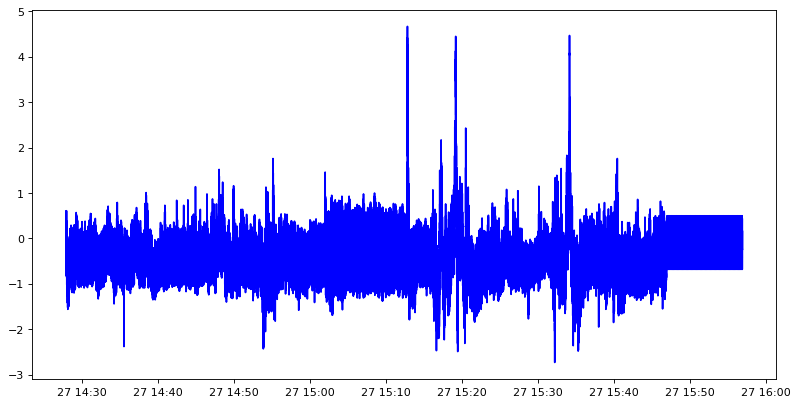

In [12]:
df_V5 = dataframe[['ECG V5-Ref', 'timestamp']]
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(df_V5['timestamp'], df_V5['ECG V5-Ref'], label='Value', color='blue')

/var/folders/0d/k6fp1fdn4zq7txfc1wxkrl1w0000gn/T/ipykernel_30478/4025650114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_V5['timestamp'] = pd.to_datetime(df_V5['timestamp'])


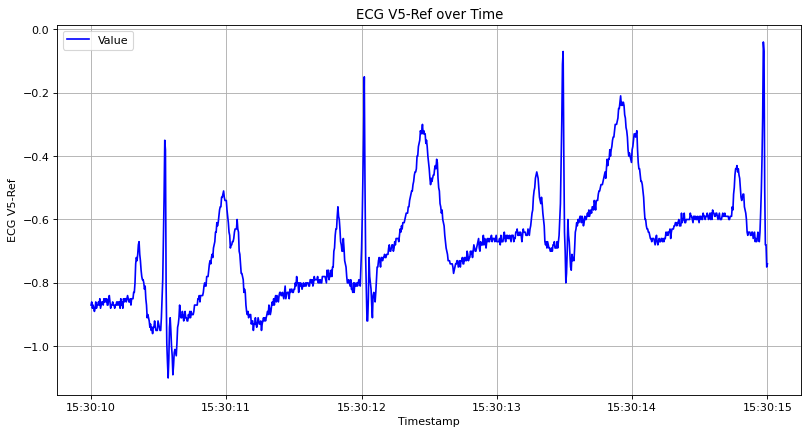

In [19]:
df_V5['timestamp'] = pd.to_datetime(df_V5['timestamp'])

# Задайте начальную и конечную дату фильтрации
start_date = '2010-12-27 15:30:10'
end_date = '2010-12-27 15:30:15'

# Фильтрация данных по диапазону дат
filtered_df = df_V5.loc[(df_V5['timestamp'] >= start_date) & (df_V5['timestamp'] <= end_date), ['ECG V5-Ref', 'timestamp']]

# Построение графика для отфильтрованных данных
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(filtered_df['timestamp'], filtered_df['ECG V5-Ref'], label='Value', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref')
plt.title('ECG V5-Ref over Time')
plt.legend()
plt.grid(True)
plt.show()

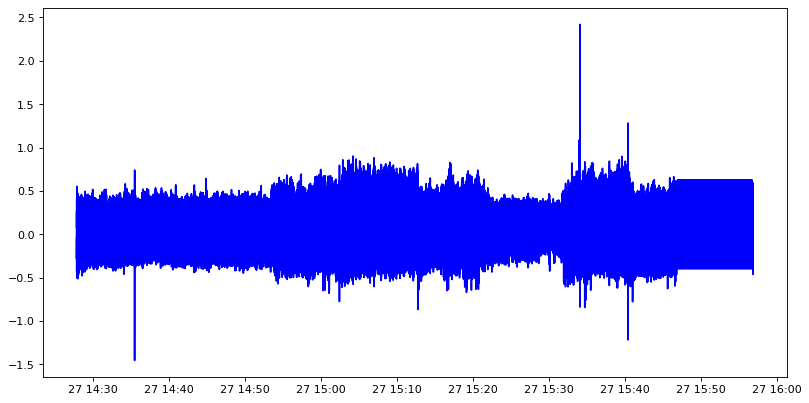

In [14]:
df_V5_cleaned = df_V5.copy()
df_V5_cleaned['ECG V5-Ref_cleaned'] = nk.ecg_clean(df_V5['ECG V5-Ref'], sampling_rate=sampling_rate)

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(df_V5_cleaned['timestamp'], df_V5_cleaned['ECG V5-Ref_cleaned'], label='Value', color='blue')


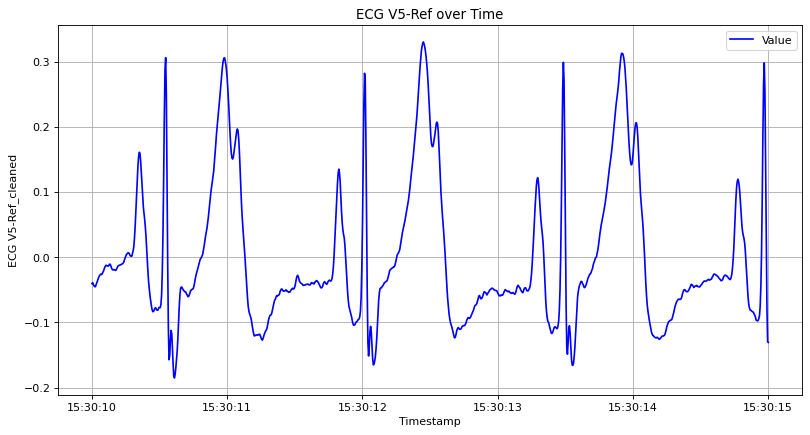

In [24]:
df_V5_cleaned['timestamp'] = pd.to_datetime(df_V5_cleaned['timestamp'])

# Задайте начальную и конечную дату фильтрации
start_date = '2010-12-27 15:30:10'
end_date = '2010-12-27 15:30:15'

# Фильтрация данных по диапазону дат
filtered_df_cleaned = df_V5_cleaned.loc[(df_V5_cleaned['timestamp'] >= start_date) & (df_V5_cleaned['timestamp'] <= end_date), ['ECG V5-Ref_cleaned', 'timestamp']]

# Построение графика для отфильтрованных данных
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(filtered_df_cleaned['timestamp'], filtered_df_cleaned['ECG V5-Ref_cleaned'], label='Value', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref_cleaned')
plt.title('ECG V5-Ref over Time')
plt.legend()
plt.grid(True)
plt.show()

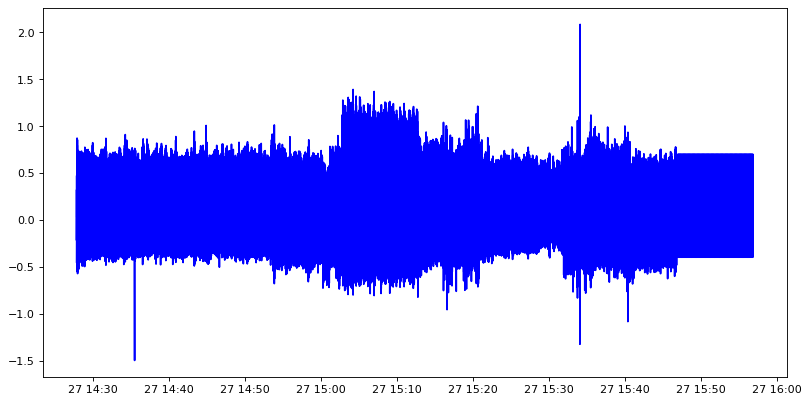

In [27]:
#Попробуем другой метод фильтрации 'biosppy'

df_V5_biosppy = df_V5.copy()
df_V5_biosppy['ECG V5-Ref_cleaned'] = nk.ecg_clean(df_V5['ECG V5-Ref'],method='biosppy', sampling_rate=sampling_rate)

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(df_V5_biosppy['timestamp'], df_V5_biosppy['ECG V5-Ref_cleaned'], label='Value', color='blue')

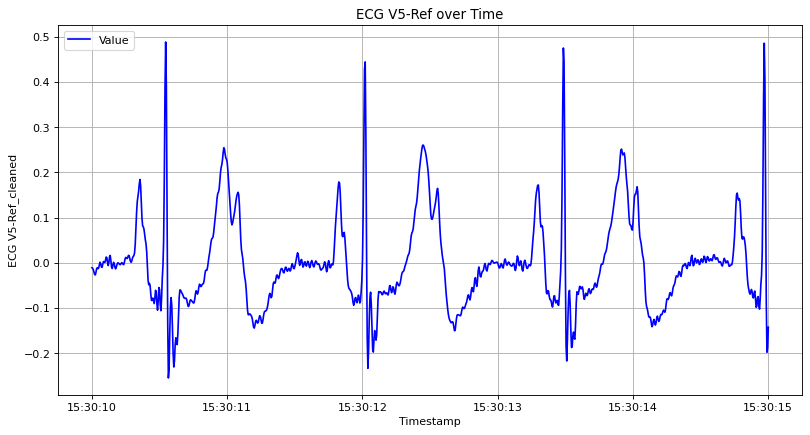

In [28]:
df_V5_biosppy['timestamp'] = pd.to_datetime(df_V5_biosppy['timestamp'])

# Задайте начальную и конечную дату фильтрации
start_date = '2010-12-27 15:30:10'
end_date = '2010-12-27 15:30:15'

# Фильтрация данных по диапазону дат
filtered_df_biosppy = df_V5_biosppy.loc[(df_V5_biosppy['timestamp'] >= start_date) & (df_V5_biosppy['timestamp'] <= end_date), ['ECG V5-Ref_cleaned', 'timestamp']]

# Построение графика для отфильтрованных данных
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(filtered_df_biosppy['timestamp'], filtered_df_biosppy['ECG V5-Ref_cleaned'], label='Value', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref_cleaned')
plt.title('ECG V5-Ref over Time')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
df_V5_biosppy.columns

Index(['ECG V5-Ref', 'timestamp', 'ECG V5-Ref_cleaned'], dtype='object')

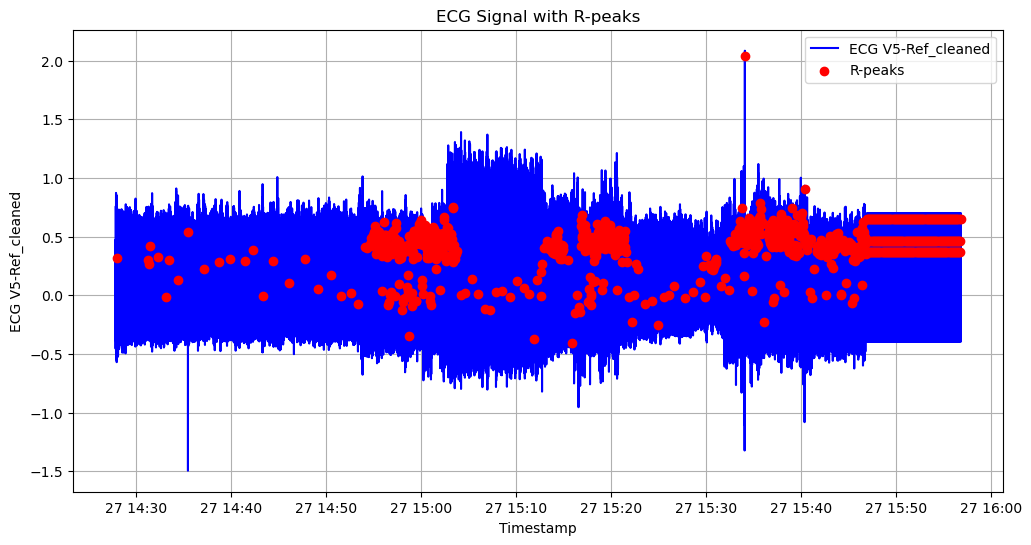

In [31]:
ecg_signal = df_V5_biosppy['ECG V5-Ref_cleaned']

# Используем функцию для сигналов ЭКГ из neurokit2, чтобы найти R-пики
signals, info = nk.ecg_process(ecg_signal, sampling_rate=200)  
r_peaks_indices = info['ECG_R_Peaks']

# Создание столбца для классов, где 1 — R-пик, 0 — остальные
df_V5_biosppy['R_Peak_Class'] = 0
df_V5_biosppy.loc[r_peaks_indices, 'R_Peak_Class'] = 1

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(df_V5_biosppy['timestamp'], df_V5_biosppy['ECG V5-Ref_cleaned'], label='ECG V5-Ref_cleaned', color='blue')

plt.scatter(df_V5_biosppy.loc[r_peaks_indices, 'timestamp'], 
            df_V5_biosppy.loc[r_peaks_indices, 'ECG V5-Ref_cleaned'], 
            color='red', label='R-peaks', zorder=5)

plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref_cleaned')
plt.title('ECG Signal with R-peaks')
plt.legend()
plt.grid(True)
plt.show()

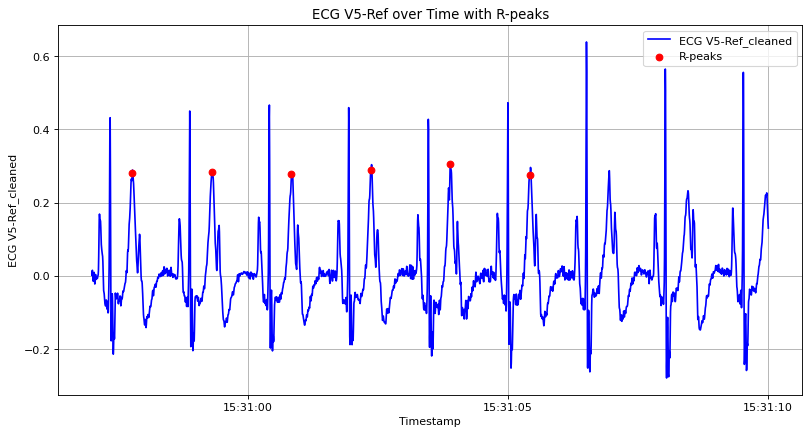

In [39]:
start_date = '2010-12-27 15:30:57'
end_date = '2010-12-27 15:31:10'

df_V5_biosppy['timestamp'] = pd.to_datetime(df_V5_biosppy['timestamp'])
filtered_df_biosppy = df_V5_biosppy.loc[(df_V5_biosppy['timestamp'] >= start_date) & (df_V5_biosppy['timestamp'] <= end_date)]

# Находим индексы R-пиков внутри выбранного диапазона
filtered_r_peaks_indices = filtered_df_biosppy.index[filtered_df_biosppy['R_Peak_Class'] == 1]

# Построение графика для отфильтрованных данных
plt.figure(figsize=(12, 6), dpi=80)
plt.plot(filtered_df_biosppy['timestamp'], filtered_df_biosppy['ECG V5-Ref_cleaned'], label='ECG V5-Ref_cleaned', color='blue')

# Визуализация R-пиков для отфильтрованных данных
plt.scatter(filtered_df_biosppy.loc[filtered_r_peaks_indices, 'timestamp'],
            filtered_df_biosppy.loc[filtered_r_peaks_indices, 'ECG V5-Ref_cleaned'],
            color='red', label='R-peaks', zorder=5)

plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref_cleaned')
plt.title('ECG V5-Ref over Time with R-peaks')
plt.legend()
plt.grid(True)
plt.show()

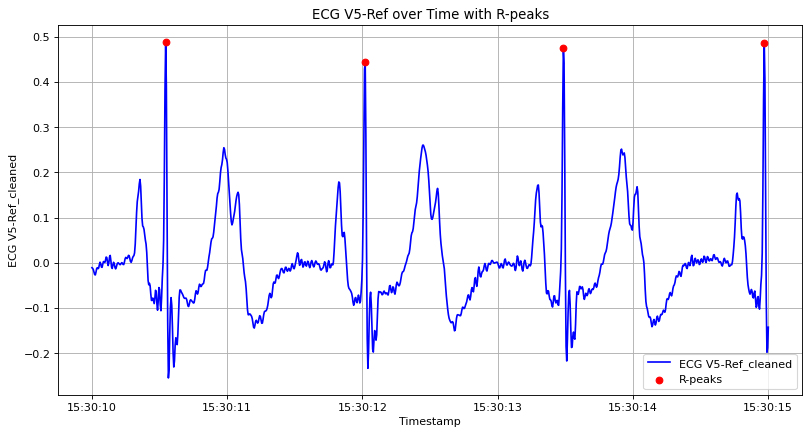

In [80]:
ecg_signal = df_V5_biosppy['ECG V5-Ref_cleaned']


_, r_peaks = nk.ecg_peaks(ecg_signal,method='neurokit', sampling_rate=400)  # измените частоту, если она отличается

# Создание столбца для классов, где 1 — R-пик, 0 — остальные
df_V5_biosppy['R_Peak_Class'] = 0
df_V5_biosppy.loc[r_peaks['ECG_R_Peaks'], 'R_Peak_Class'] = 1


start_date = '2010-12-27 15:30:10'
end_date = '2010-12-27 15:30:15'

df_V5_biosppy['timestamp'] = pd.to_datetime(df_V5_biosppy['timestamp'])
filtered_df_biosppy = df_V5_biosppy.loc[(df_V5_biosppy['timestamp'] >= start_date) & (df_V5_biosppy['timestamp'] <= end_date)]

filtered_r_peaks_indices = filtered_df_biosppy.index[filtered_df_biosppy['R_Peak_Class'] == 1]

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(filtered_df_biosppy['timestamp'], filtered_df_biosppy['ECG V5-Ref_cleaned'], label='ECG V5-Ref_cleaned', color='blue')

# Визуализация R-пиков для отфильтрованных данных
plt.scatter(filtered_df_biosppy.loc[filtered_r_peaks_indices, 'timestamp'],
            filtered_df_biosppy.loc[filtered_r_peaks_indices, 'ECG V5-Ref_cleaned'],
            color='red', label='R-peaks', zorder=5)

plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref_cleaned')
plt.title('ECG V5-Ref over Time with R-peaks')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
ecg_signal = df_V5_biosppy['ECG V5-Ref_cleaned']

r_info, r_peaks = nk.ecg_peaks(ecg_signal, method='neurokit', sampling_rate=400)

# Создаем столбец для R-пиков
df_V5_biosppy['R_Peak_Class'] = 0
if 'ECG_R_Peaks' in r_peaks:
    df_V5_biosppy.loc[r_peaks['ECG_R_Peaks'], 'R_Peak_Class'] = 1

signals, waves_peak = nk.ecg_delineate(ecg_signal, r_peaks, sampling_rate=400, method="dwt")

# Создание столбцов для классов пиков (по умолчанию 0 для всех)
for peak_type in ['Q', 'S', 'T', 'P']:
    df_V5_biosppy[f'{peak_type}_Peak_Class'] = 0

for wave_type, column_name in [('ECG_Q_Peaks', 'Q_Peak_Class'), 
                               ('ECG_S_Peaks', 'S_Peak_Class'), 
                               ('ECG_T_Peaks', 'T_Peak_Class'), 
                               ('ECG_P_Peaks', 'P_Peak_Class')]:
    if wave_type in waves_peak:
        indices = waves_peak[wave_type]
        if indices is not None:
            indices = np.array(indices)
            indices = indices[~np.isnan(indices)].astype(int)
            df_V5_biosppy.loc[indices, column_name] = 1

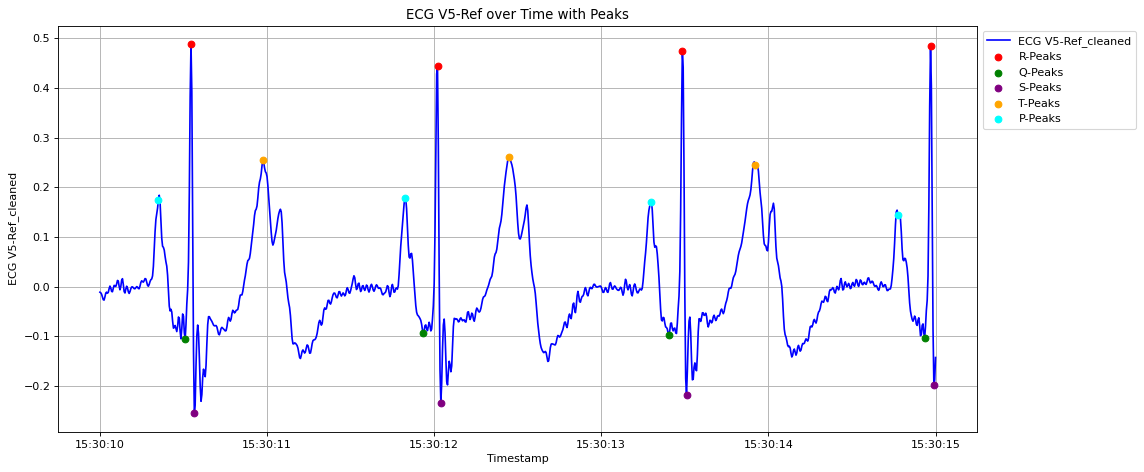

In [102]:
#Нарисуем результаты
start_date = '2010-12-27 15:30:10'
end_date = '2010-12-27 15:30:15'

filtered_df_biosppy = df_V5_biosppy.loc[(df_V5_biosppy['timestamp'] >= start_date) & (df_V5_biosppy['timestamp'] <= end_date)]

plt.figure(figsize=(12, 6), dpi=80)
plt.plot(filtered_df_biosppy['timestamp'], filtered_df_biosppy['ECG V5-Ref_cleaned'], label='ECG V5-Ref_cleaned', color='blue')

colors = {'R': 'red', 'Q': 'green', 'S': 'purple', 'T': 'orange', 'P': 'cyan'}
for peak_name, column_name in [('R', 'R_Peak_Class'), ('Q', 'Q_Peak_Class'), 
                               ('S', 'S_Peak_Class'), ('T', 'T_Peak_Class'), 
                               ('P', 'P_Peak_Class')]:
    indices = filtered_df_biosppy.index[filtered_df_biosppy[column_name] == 1]
    plt.scatter(filtered_df_biosppy.loc[indices, 'timestamp'],
                filtered_df_biosppy.loc[indices, 'ECG V5-Ref_cleaned'],
                color=colors[peak_name], label=f'{peak_name}-Peaks', zorder=5)

plt.xlabel('Timestamp')
plt.ylabel('ECG V5-Ref_cleaned')
plt.title('ECG V5-Ref over Time with Peaks')
# plt.legend()
plt.grid(True)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Установим больше пространства справа для размещения легенды снаружи
plt.tight_layout(rect=[0, 0, 1.2, 1])
plt.show()